# **Get Data**
Get Data from twitter using tweepy and integrated with Twitter Developer Portal to get the API token.


In [ ]:
%pip install tweepy==4.6.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
from tweepy import *

import tweepy
import csv
import re 
import string
 
consumer_key = 'wuPuP6lccKSuqDk7AUEDvHi26'
consumer_secret = 'yf76kho0nqNayOKeQv7QBmhFmPpwOj8FLIfCk3rsnFew9J9Orp'
access_key = '1576493200138567681-kAiUnsBg73TncO8kGdBIjMx30k0VTL'
access_secret = '7vYWn2B4vWfMp3R7Pc3cipD0Nh0pUOOaNvkbR4KN9Aor5'
 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
 
api = tweepy.API(auth,wait_on_rate_limit=True)
 
# csvFile = open('test', 'a')
# csvWriter = csv.writer(csvFile)
 
# search_words = "#palestine"      # enter your words
# new_search = search_words + " -filter:retweets"
 
# for tweet in tweepy.Cursor(api.search_tweets,q=new_search,count=100,
#                            lang="en",
#                            since_id=0).items():
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])


In [ ]:
hashtag = '#IranProtests'
query = tweepy.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweets': tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': 'RT @DUALIPA: we can make some fkn noise. I stand with the women of Iran. \n\n#mashaamini #nikashakarami #sarinaesmailzadeh #hadisnajafi #iran…', 'Timestamp': datetime.datetime(2022, 10, 9, 7, 54, 16, tzinfo=datetime.timezone.utc)}, {'Tweets': 'RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفاق افتاد. نیروی انتظامی در قسمتی از تهران به مردم پیوست. ما پیروز خواهیم شد.\n\n#مهسا_امینی #اعت…', 'Timestamp': datetime.datetime(2022, 10, 9, 7, 54, 13, tzinfo=datetime.timezone.utc)}, {'Tweets': 'RT @NUFDIran: BREAKING: the Islamic Republic’s propaganda service (IRIB) is hacked during a Khamenei promo video with a message for him: “o…', 'Timestamp': datetime.datetime(2022, 10, 9, 7, 54, 10, tzinfo=datetime.timezone.utc)}, {'Tweets': "RT @LicypriyaK: No Indian women show real solidarity to the women of Iran 🇮🇷. Today, I'm showing the true solidarity.\n\nI'm cutting my hair…", 'Timestamp': datetime.datetime(2022, 10, 9, 7, 54, 10, tzinfo=datetime.timezone.utc)}, {'Tweets': 'RT @officejjsm

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.DataFrame.from_dict(tweets)

In [ ]:
df.head()

,Tweets,Timestamp
0,RT @DUALIPA: we can make some fkn noise. I sta...,2022-10-09 07:54:16+00:00
1,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...,2022-10-09 07:54:13+00:00
2,RT @NUFDIran: BREAKING: the Islamic Republic’s...,2022-10-09 07:54:10+00:00
3,RT @LicypriyaK: No Indian women show real soli...,2022-10-09 07:54:10+00:00
4,RT @officejjsmart: 🇮🇷 Iranian protestors are c...,2022-10-09 07:54:10+00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Tweets     1000 non-null   object             
 1   Timestamp  1000 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

Tweets       0
Timestamp    0
dtype: int64

In [ ]:
df.columns

Index(['Tweets', 'Timestamp'], dtype='object')

In [ ]:
text_df = df.drop(['Timestamp'], axis=1)
text_df.head()

,Tweets
0,RT @DUALIPA: we can make some fkn noise. I sta...
1,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...
2,RT @NUFDIran: BREAKING: the Islamic Republic’s...
3,RT @LicypriyaK: No Indian women show real soli...
4,RT @officejjsmart: 🇮🇷 Iranian protestors are c...


In [ ]:
print(text_df['Tweets'].iloc[0],"\n")
print(text_df['Tweets'].iloc[1],"\n")
print(text_df['Tweets'].iloc[2],"\n")
print(text_df['Tweets'].iloc[3],"\n")
print(text_df['Tweets'].iloc[4],"\n")

RT @DUALIPA: we can make some fkn noise. I stand with the women of Iran. 

#mashaamini #nikashakarami #sarinaesmailzadeh #hadisnajafi #iran… 

RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفاق افتاد. نیروی انتظامی در قسمتی از تهران به مردم پیوست. ما پیروز خواهیم شد.

#مهسا_امینی #اعت… 

RT @NUFDIran: BREAKING: the Islamic Republic’s propaganda service (IRIB) is hacked during a Khamenei promo video with a message for him: “o… 

RT @LicypriyaK: No Indian women show real solidarity to the women of Iran 🇮🇷. Today, I'm showing the true solidarity.

I'm cutting my hair… 

RT @officejjsmart: 🇮🇷 Iranian protestors are continuing in force. Yesterday’s TV news was hacked with an image of the Ayatollah burning.

T… 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
text_df.text = text_df['Tweets'].apply(data_processing)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
text_df = text_df.drop_duplicates('Tweets')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['Tweets'] = text_df['Tweets'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,Tweets
0,RT @DUALIPA: we can make some fkn noise. I sta...
1,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...
2,RT @NUFDIran: BREAKING: the Islamic Republic’s...
3,RT @LicypriyaK: No Indian women show real soli...
4,RT @officejjsmart: 🇮🇷 Iranian protestors are c...


In [ ]:
print(text_df['Tweets'].iloc[0],"\n")
print(text_df['Tweets'].iloc[1],"\n")
print(text_df['Tweets'].iloc[2],"\n")
print(text_df['Tweets'].iloc[3],"\n")
print(text_df['Tweets'].iloc[4],"\n")

RT @DUALIPA: we can make some fkn noise. I stand with the women of Iran. 

#mashaamini #nikashakarami #sarinaesmailzadeh #hadisnajafi #iran… 

RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفاق افتاد. نیروی انتظامی در قسمتی از تهران به مردم پیوست. ما پیروز خواهیم شد.

#مهسا_امینی #اعت… 

RT @NUFDIran: BREAKING: the Islamic Republic’s propaganda service (IRIB) is hacked during a Khamenei promo video with a message for him: “o… 

RT @LicypriyaK: No Indian women show real solidarity to the women of Iran 🇮🇷. Today, I'm showing the true solidarity.

I'm cutting my hair… 

RT @officejjsmart: 🇮🇷 Iranian protestors are continuing in force. Yesterday’s TV news was hacked with an image of the Ayatollah burning.

T… 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 984
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  288 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['Tweets'].apply(polarity)

In [ ]:
text_df.head(10)

,Tweets,polarity
0,RT @DUALIPA: we can make some fkn noise. I sta...,0.000000
1,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...,0.000000
2,RT @NUFDIran: BREAKING: the Islamic Republic’s...,-0.100000
3,RT @LicypriyaK: No Indian women show real soli...,-0.016667
4,RT @officejjsmart: 🇮🇷 Iranian protestors are c...,0.000000
5,RT @Omid_M: I love this video… I got to see ma...,0.500000
6,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...,-0.390625
7,RT @Omid_M: Terrible! A woman got shot in Mash...,-1.000000
10,RT @Maryam_Rajavi_A: #إيران تنتفض في اليوم الـ...,0.000000
12,RT @rezahakbari: Security forces shooting at p...,0.000000


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head()

,Tweets,polarity,sentiment
0,RT @DUALIPA: we can make some fkn noise. I sta...,0.000000,Neutral
1,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...,0.000000,Neutral
2,RT @NUFDIran: BREAKING: the Islamic Republic’s...,-0.100000,Negative
3,RT @LicypriyaK: No Indian women show real soli...,-0.016667,Negative
4,RT @officejjsmart: 🇮🇷 Iranian protestors are c...,0.000000,Neutral


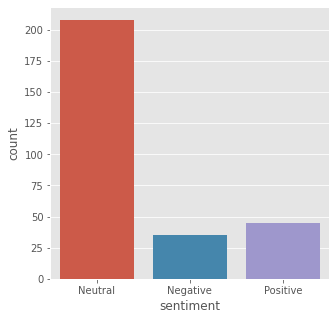

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

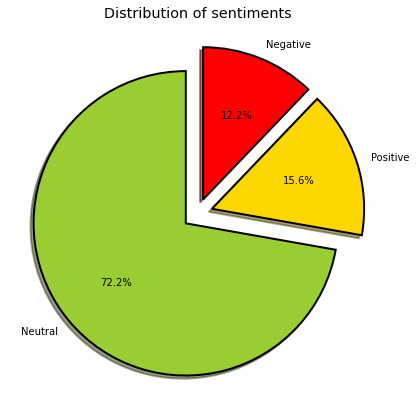

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Tweets,polarity,sentiment
929,Iranian regime is murdering innocent kids for ...,1.000000,Positive
649,RT @chelseahartisme: I looked up Khamenei’s tw...,0.800000,Positive
243,RT @Israel: Women. Life. Freedom. \n\nToday Is...,0.800000,Positive
406,"RT @SepidehMoafi: Please watch. Her life, her ...",0.666667,Positive
781,"RT @NazaninNour: You’re doing amazing, sweetie...",0.600000,Positive


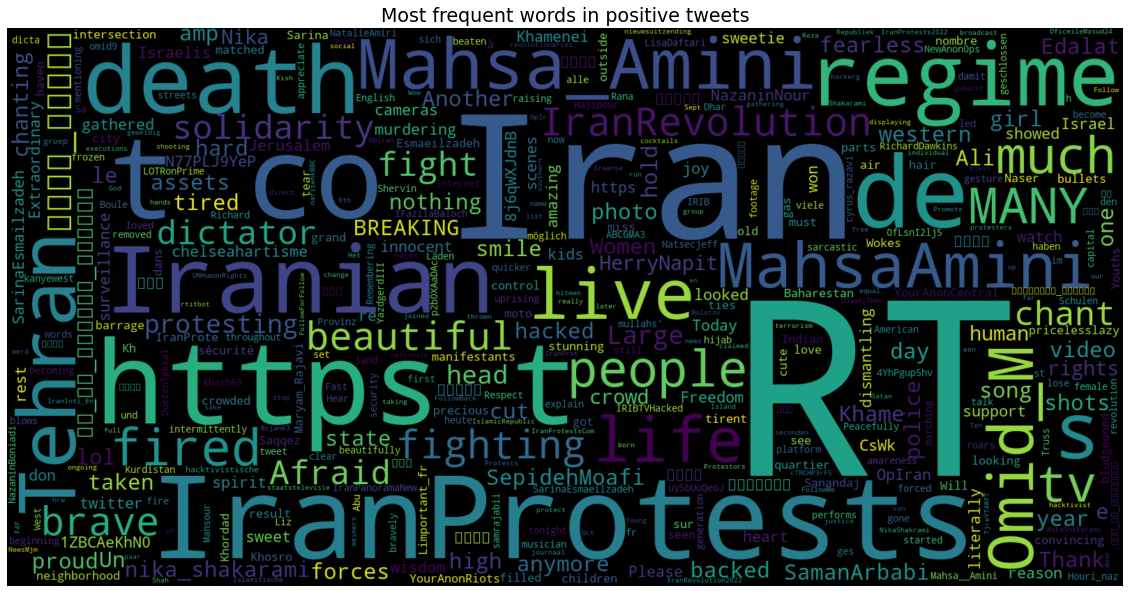

In [ ]:
text = ' '.join([word for word in pos_tweets['Tweets']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Tweets,polarity,sentiment
51,RT @nafisehkBBC: And this is 16 year old Sarin...,-0.013333,Negative
3,RT @LicypriyaK: No Indian women show real soli...,-0.016667,Negative
381,RT @justinbroadcast: #BREAKING: Iran regime ki...,-0.016667,Negative
848,Please explain why cutting hair for...selectiv...,-0.050000,Negative
538,RT @Kurdetay: Warning: a young women shot and ...,-0.050000,Negative


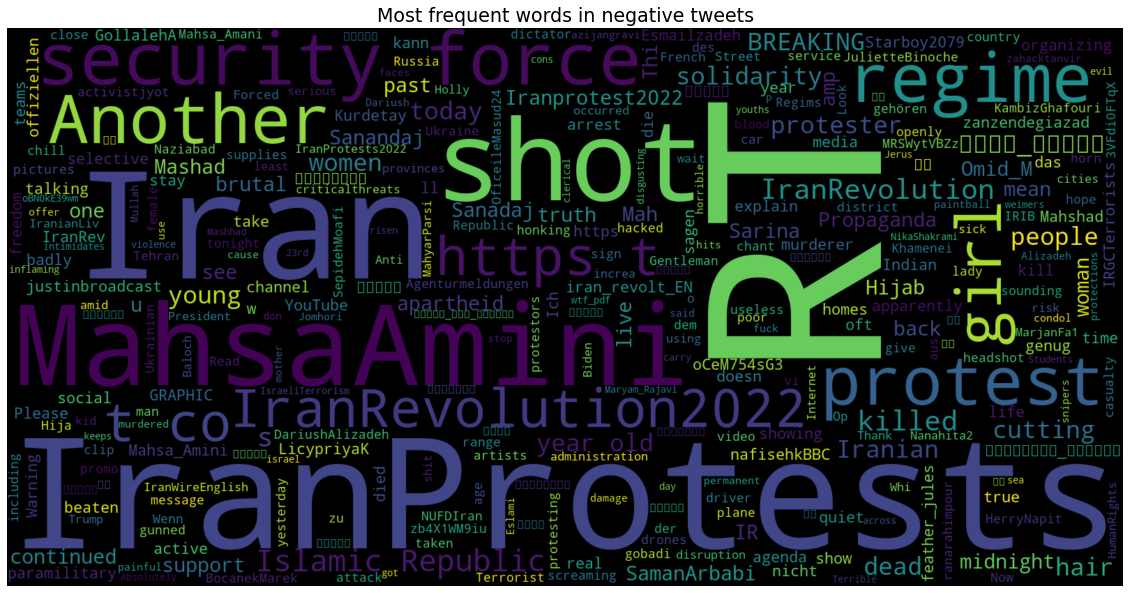

In [ ]:
text = ' '.join([word for word in neg_tweets['Tweets']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Tweets,polarity,sentiment
0,RT @DUALIPA: we can make some fkn noise. I sta...,0.0,Neutral
1,RT @SamanArbabi: لحظه ای تاریخی.. بالاخره اتفا...,0.0,Neutral
533,RT @bvereint: Be Sabrina‘s voice!\n#Mahsa_Amin...,0.0,Neutral
535,RT @gzzzz888: @kanyewest Women - life - freedo...,0.0,Neutral
543,RT @Btokhm: بازم بسیجی رو بعد از کتک خوردن ول ...,0.0,Neutral


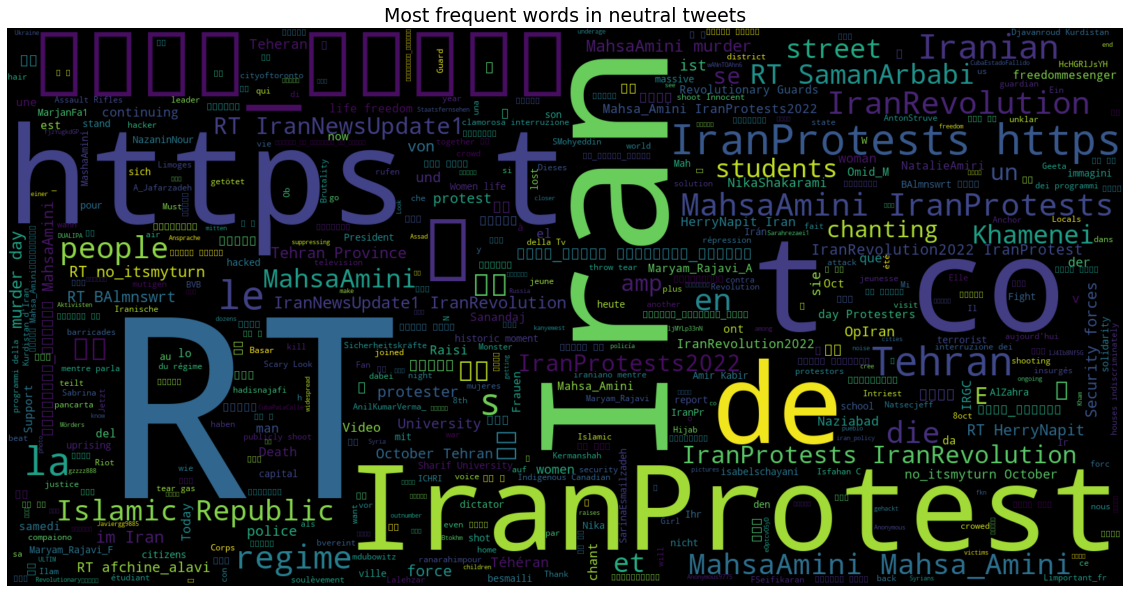

In [ ]:
text = ' '.join([word for word in neutral_tweets['Tweets']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Tweets'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 6427

First 20 features:
 ['0flsni2lj5', '15', '15 khordad', '16', '16 ans', '16 year', '16 مهر', '16 वर', '16مهر1401', '16مهر1401 هموطنان', '17', '17 nika', '1nu6jvwgvc', '1zbcaekhn0', '20', '20 provinces', '20 tagen', '20 ten', '2020', '2020 the']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = text_df['Tweets']
Y = text_df['sentiment']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (230, 6427)
Size of y_train: (230,)
Size of x_test: (58, 6427)
Size of y_test: (58,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 74.14%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[118  17  73]
 [ 13  98  54]
 [ 61  30 296]]


              precision    recall  f1-score   support

    Negative       0.61      0.57      0.59       208
     Neutral       0.68      0.59      0.63       165
    Positive       0.70      0.76      0.73       387

    accuracy                           0.67       760
   macro avg       0.66      0.64      0.65       760
weighted avg       0.67      0.67      0.67       760



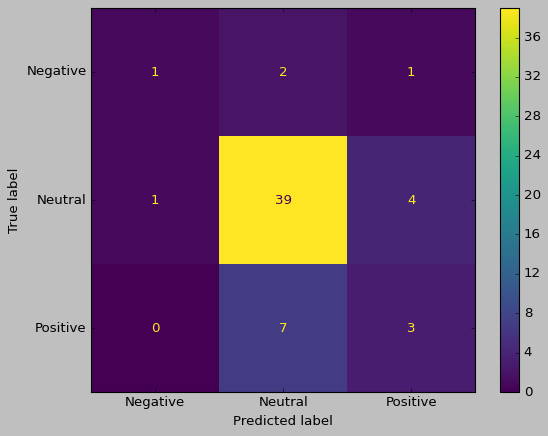

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.1}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 74.14%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 0  3  1]
 [ 1 41  2]
 [ 0  8  2]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.79      0.93      0.85        44
    Positive       0.40      0.20      0.27        10

    accuracy                           0.74        58
   macro avg       0.40      0.38      0.37        58
weighted avg       0.67      0.74      0.69        58



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 74.14%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 1  2  1]
 [ 2 38  4]
 [ 0  6  4]]


              precision    recall  f1-score   support

    Negative       0.33      0.25      0.29         4
     Neutral       0.83      0.86      0.84        44
    Positive       0.44      0.40      0.42        10

    accuracy                           0.74        58
   macro avg       0.53      0.50      0.52        58
weighted avg       0.73      0.74      0.73        58



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 74.14%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 1  2  1]
 [ 2 38  4]
 [ 0  6  4]]


              precision    recall  f1-score   support

    Negative       0.33      0.25      0.29         4
     Neutral       0.83      0.86      0.84        44
    Positive       0.44      0.40      0.42        10

    accuracy                           0.74        58
   macro avg       0.53      0.50      0.52        58
weighted avg       0.73      0.74      0.73        58



Additional code to extract data form twitter using twitter api

In [ ]:
import tweepy #to access the twitter api
import pandas as pd #for basic data operations

In [ ]:
# Importing the keys from twitter api
consumerKey = "xxxxxxxxxxxxxxxxxxxx"
consumerSecret = "xxxxxxxxxxxxxxxxxxxx"
accessToken = "xxxxxxxxxxxxxxxxxxxx"
accessTokenSecret = "xxxxxxxxxxxxxxxxxxxx"

In [ ]:
# Establish the connection with twitter API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
# Search for the Term and define number of tweets 
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: IranProtests
Enter how many tweets to search: 15


In [ ]:
# Get no of tweets and searched term together 
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm).items(NoOfTerms)